# Brusselator

The Brusselator is a simplified model for chemical reactions that oscillate. The reaction scheme is as follows:
$$
\begin{align}
A  &\overset{k_1}\longrightarrow X \tag{1} \\
B + X &\overset{k_2}\longrightarrow Y + D \tag{2}\\
2X + Y &\overset{k_3}\longrightarrow 3X \tag{3}\\
X &\overset{k_4}\longrightarrow E \tag{4}\\
\end{align}
 $$

`A, B, D, E, X, Y` are the reactants species. 
We will use the general formulation of the mass action in differential form to derive the differentiatl equations that govern the dynamics of the system. 
$$
\begin{align}
\frac{\mathrm{d} X}{\mathrm{d} t}&= (B-A)^T \cdot K \cdot X^A \tag{53}\\
\end{align}
$$
where  `A` and `B` are the matrices with the stoichiometric coefficients, `X` is the state vector $X=[X_1,X_2,X_3]^T$, and `K` is a matrix in the form:

$$
A=\begin{pmatrix}
 1 & 0  & 0  & 0 & 0 \\ 
 0 & 1 & 1  & \dots & 0\\ 
 0 & 0  & k_3 &\dots  &0 \\ 
 \vdots &  \vdots   &  \vdots  &  \vdots  &  \vdots  \tag{54}\\ 
 0 & 0  & 0  &  \dots & k_r 
\end{pmatrix}
$$


The system is a open reactor where we maintain a constant concentration of the reactants `A,B,D,E`.

Therefore, the  equations for the evolution of `[X]` and `[Y]` are as follows:

$$\begin{align}       
            \frac{ d[X] }{dt} &= k_1[A] − k_2[B][X] + k_3[X]^2[Y] − k_4[X]\tag{5} \\ 
            \frac{ d[Y] }{dt} &= k_2[B][X] − k_3[X]^2[Y]  \tag{6}   
            \end{align}            $$

We assume as initial conditions:

$$\begin{align}       
            [X (0)] &= 0 \tag{7} \\ 
            [Y (0)] &= 0   \tag{8}   
            \end{align}            $$

To calculate the equilibrium, we just set eqs. 5 and 6 to zero and solve for `X` and `Y`. 

$$\begin{align}       
            [X]_{eq} &= \frac{k_1 [A]}{k_4}\tag{5} \\ 
            [Y]_{eq} &= \frac{k_4  k_2 [B]}{k_3  k_1 [A]} \tag{6}   
            \end{align}            $$
            
            
To evaluate stability, we will  evaluate the Jacobian at the stationary state $([X]_{eq},[Y]_{eq})$. 

The parameters sets to try are:

$$
k_1=1\\
k_2=1\\
k_3=1\\
k_4=1\\
A=1\\
B=3
$$

In [1]:
using DifferentialEquations

In [2]:
using Plots; gr()

Plots.GRBackend()

In [3]:
brusselator! = @ode_def BR begin
    dX = k_1 * A - k_2 * B * X + k_3 * X^2 * Y - k_4 * X
    dY = k_2 * B * X - k_3 * X^2 * Y
    end k_1 k_2 k_3 k_4 A B

(::BR{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

In [4]:
tspan = (0.0,50.0)
k_1=1.
k_2=1.
k_3=1.
k_4=1.
A=1.
B=3.
u₀=[0.0,0.0]
p=[k_1,k_2,k_3,k_4,A,B];

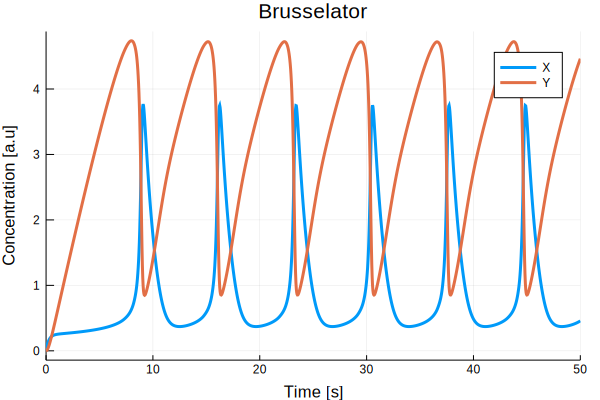

In [5]:
prob1 = ODEProblem(brusselator!,u₀,tspan,p)
sol1 = solve(prob1)
plot(sol1,label=["X","Y"])
title!("Brusselator")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

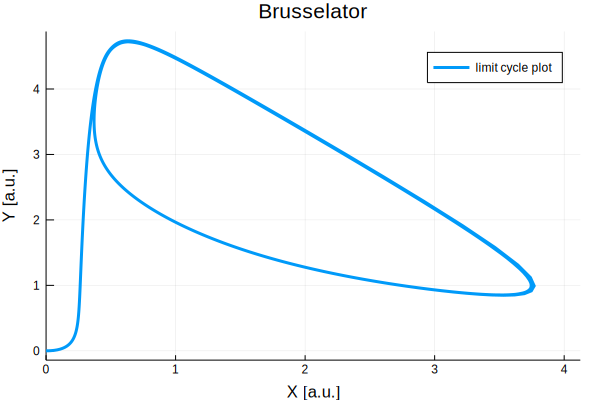

In [6]:
plot(sol1,vars=(1,2),label=["limit cycle plot"])
title!("Brusselator ")
xlabel!("X [a.u.]")
ylabel!("Y [a.u.]")